# Decision Trees

![](../figures/ml_map.jpg)
* Essentially if-then-else statements  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from src import helper
from sklearn.datasets import load_iris

In [2]:
import warnings
warnings.filterwarnings('ignore')

### XOR Function

In [3]:
xor = pd.DataFrame([[0,0,0],[0,1,1],[1,0,1],[1,1,0]],columns=['x1','x2','y'])
xor.head()

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


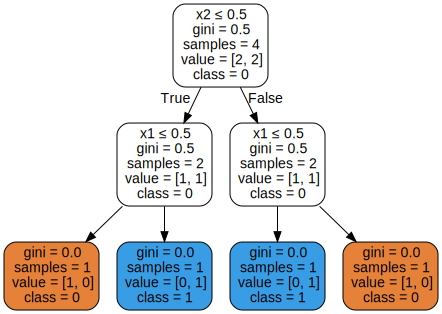

In [4]:
dt = tree.DecisionTreeClassifier()
dt.fit(xor[['x1','x2']], xor['y'])

helper.display_tree(dt, ['x1','x2'], ['0','1'], out_file='XOR')

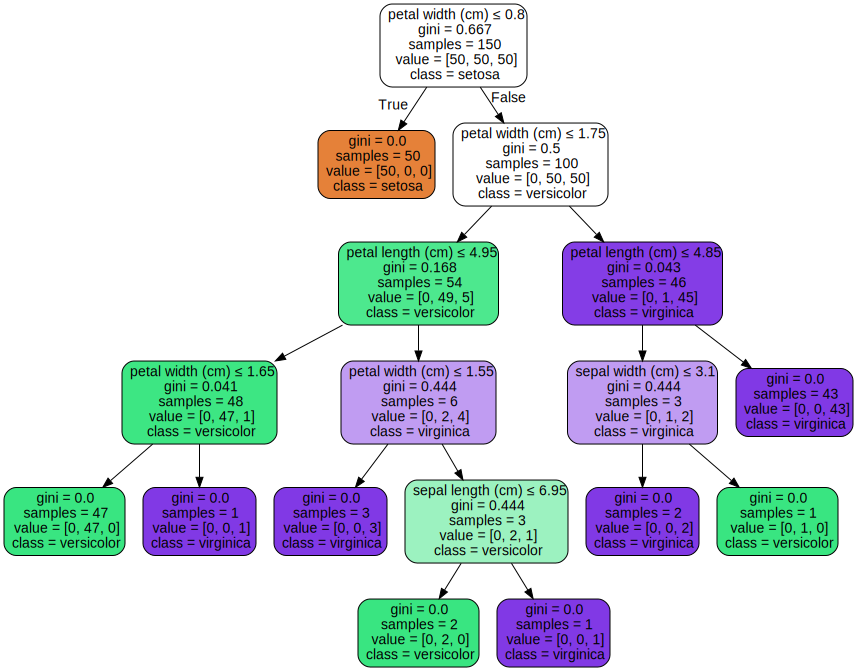

In [5]:
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

helper.display_tree(clf, iris.feature_names, iris.target_names,out_file='iris')

# Picking What Features to Split On

### Measure uncertainty
* Good split if we are more certain about classification after split
* Deterministic (all true or false) -> Best
* Uniform distribution -> Bad

### Entropy
* The more uncertain we are, the more entropy  
* **Information Theory:** H(X) is the expected number of bits needed to encode a randomly drawn value of X (under the most efficient code)  

\begin{equation}
    H(Y) = - \sum_{i=1}^{k} P(Y=y_{i}) \log P(Y=y_{i})
\end{equation}

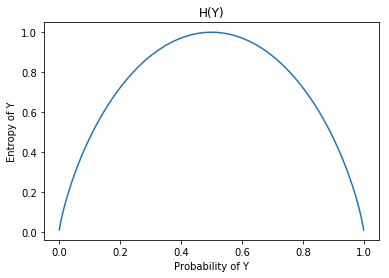

In [6]:
y = np.linspace(0,1,1000)
H = - (y * np.log2(y) + (1-y)*np.log2(1-y))

plt.plot(y,H)
plt.xlabel('Probability of Y')
plt.ylabel('Entropy of Y')
plt.title('H(Y)')
plt.show()

### Information Gain
\begin{equation}
    IG(X) = H(Y) - H(Y|X)
\end{equation}

\begin{equation}
    H(Y|X) = - \sum_{j=1}^{v} P(X=x_j) \sum_{i=1}^{k} P(Y=y_i | X=x_{j}) \log P(Y=y_i | X=x_{j})
\end{equation}

In [7]:
tf = pd.DataFrame([
    ['T','T','T'],
    ['T','F','T'],
    ['T','T','T'],
    ['T','F','T'],
    ['F','T','T'],
    ['F','F','F']],columns=['x1','x2','y'])
tf

,x1,x2,y
0,T,T,T
1,T,F,T
2,T,T,T
3,T,F,T
4,F,T,T
5,F,F,F


### H(Y)

In [8]:
total = 6.
y_num_true = tf[tf['y'] == 'T']['y'].count()
y_num_false = tf[tf['y'] == 'F']['y'].count()

y_prob_true = - (y_num_true / total) * np.log2(y_num_true/total) - (y_num_false / total) * np.log2(y_num_false/total)
y_prob_true

0.65002242164835411

# Learning Decision Trees
* Start from empty tree
* Split on best attribute (feature)
    * Highest information gain
\begin{equation}
    arg max_i IG(X_i) = arg max_i H(Y) - H(Y|X_i)
\end{equation}

# Computational Complexity
Find the best split
* N data points
* Try each feature: d features
* Try each split: update p, find H(p): $O(N * C)$  
* Total: $O(dN \log N)$  

Build Tree
* Root has N data points: $O(dN \log N)$
* Next level has N' points: $O(dN'L \log N'L) + O(dN'R \log N'R)$

# Decision Tree Decision Boundaries

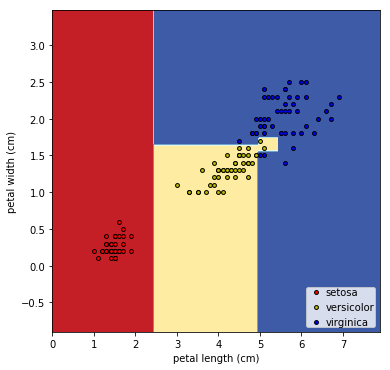

In [13]:
# Load data
iris = load_iris()
X = iris.data[:, [2,3]]
y = iris.target

fig = plt.figure(figsize=(15,10))

# Train
clf = tree.DecisionTreeClassifier().fit(X, y)

# show decision boundary
helper.display_classification_boundary(clf,0,'',iris,X,y,xlabel=iris.feature_names[2],ylabel=iris.feature_names[3])

plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

# Regression

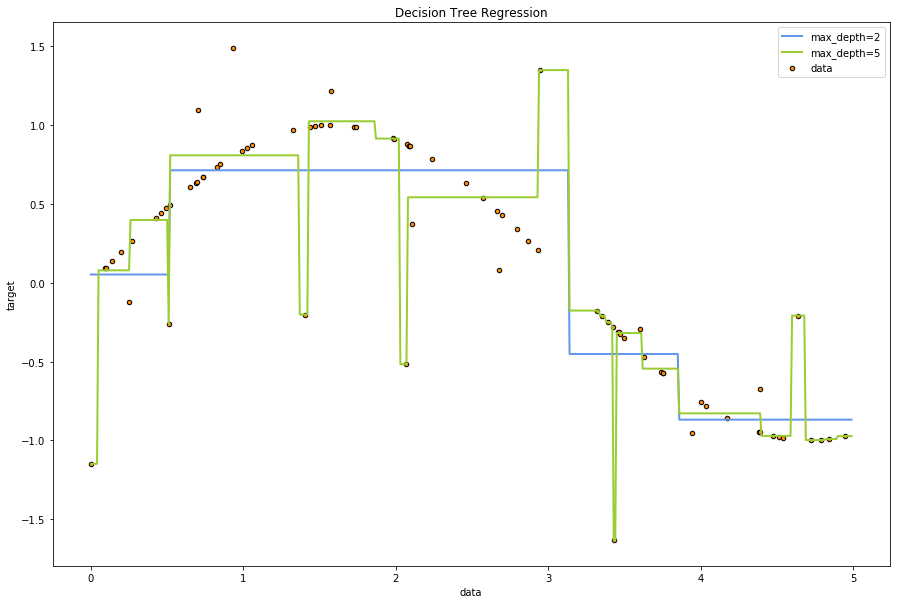

In [10]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Controlling Complexity

## Min Samples Split
The minimum number of samples required to split an internal node

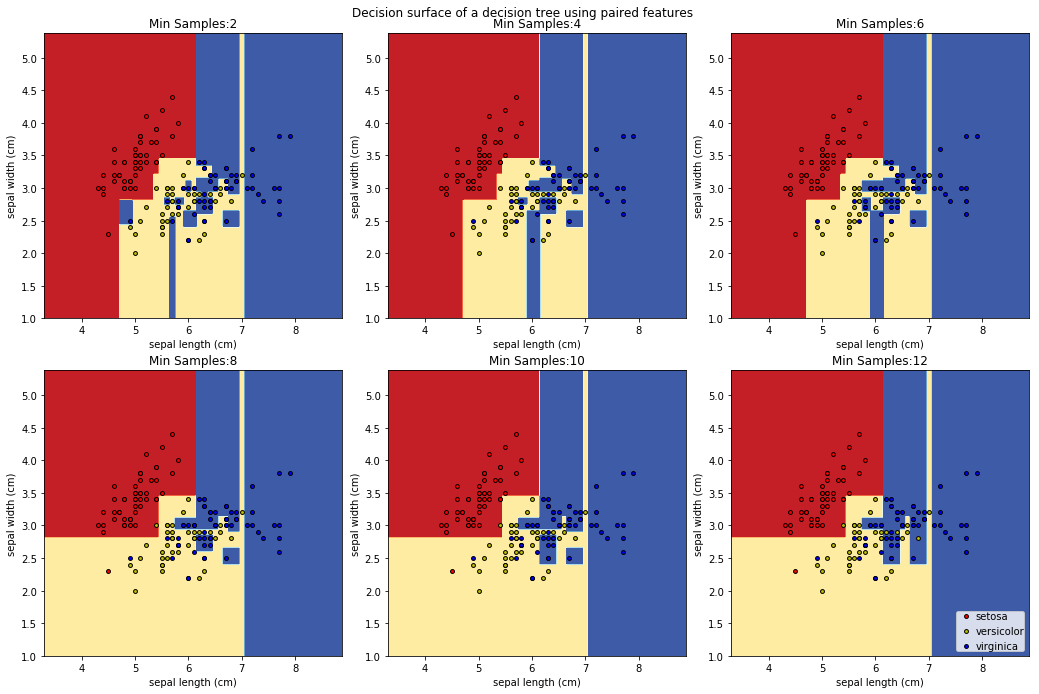

In [11]:
# Load data
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

fig = plt.figure(figsize=(15,10))
for pairidx, min_samples in enumerate(np.arange(2,13,2)):
    # We only take the two corresponding features
    X = iris.data[:, :2]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier(min_samples_split=min_samples).fit(X, y)

    helper.display_classification_boundary(clf,pairidx,'Min Samples:'+str(min_samples),iris,X,y)


plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

# Max Depth
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

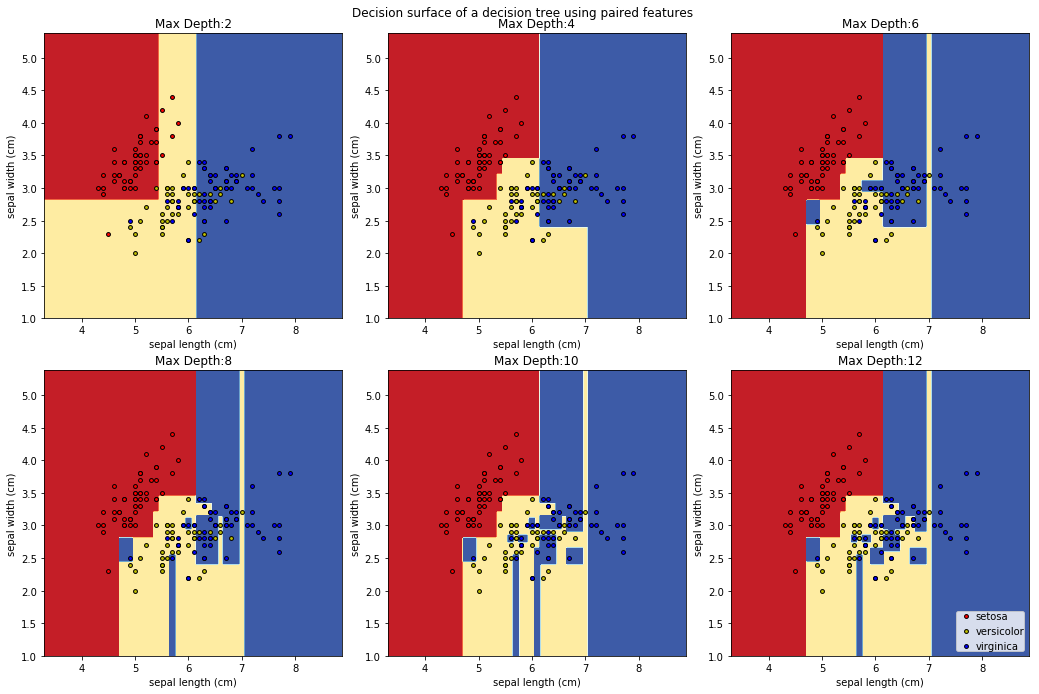

In [12]:
fig = plt.figure(figsize=(15,10))
for pairidx, max_depth in enumerate(np.arange(2,13,2)):
    # Train
    clf = tree.DecisionTreeClassifier(max_depth=max_depth).fit(X, y)

    helper.display_classification_boundary(clf,pairidx,'Max Depth:'+str(max_depth),iris,X,y)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

# Pros and Cons
Pros
* Ability of selecting the most discriminatory features
+ Explainability, easy to see why model made prediction (rule based)
+ Data classification without much calculations
+ Dealing with noisy or incomplete data
+ Handling both continuous and discrete data    

Cons
- Complexity of the tree grows with data
- Overfitting

# Summary
Decision Trees
* Flexible functional form
* At each level, pick a variable and split condition
* At leaves, predict a value

Learning Decision Trees
* Score all splits and pick the best
    * Information gain
* Stopping criteria

Complexity depends on depth
* Decision stumps: very simple classifiers
* MaxDepth, MinParents